<a href="https://colab.research.google.com/github/NZtechpapa/Cifar10SVM_CNN/blob/master/cifar10_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

Using TensorFlow backend.


In [2]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [3]:
print("Cifar10 train -  rows:",x_train.shape[0]," columns:", x_train.shape[1])
print("Cifar10 test -  rows:",x_test.shape[0]," columns:", x_test.shape[1])
y_train[1]

Cifar10 train -  rows: 50000  columns: 32
Cifar10 test -  rows: 10000  columns: 32


array([9], dtype=uint8)

In [4]:
from numpy import array

In [5]:
label_dict = {0:'ariplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
label_dict[1]

'automobile'

In [6]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)


In [7]:

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


In [8]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
#model.add(Dense(num_classes, activation='softmax'))
model.add(Dense(num_classes, activation='linear',name='svm'))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2

In [9]:

#data augmentation
#datagen = ImageDataGenerator(
#    rotation_range=15,
#    width_shift_range=0.1,
#    height_shift_range=0.1,
#    horizontal_flip=True,
#    )
datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=0,
    # randomly shift images horizontally
    width_shift_range=0.1,
    # randomly shift images vertically
    height_shift_range=0.1,
    # set range for random shear
    shear_range=0.,
    # set range for random zoom
    zoom_range=0.,
    # set range for random channel shifts
    channel_shift_range=0.,
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    # value used for fill_mode = "constant"
    cval=0.,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)



datagen.fit(x_train)

In [11]:
metrics = ['accuracy']
#optimizer = keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

In [12]:
#training
batch_size = 64

#opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
optimizer = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
#model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

In [13]:
#
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] //( batch_size),epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/125
781/781 [==============================] - 211s 270ms/step - loss: 0.8841 - acc: 0.3770 - val_loss: 0.5094 - val_acc: 0.4752
Epoch 2/125
781/781 [==============================] - 180s 230ms/step - loss: 0.4477 - acc: 0.5370 - val_loss: 0.4245 - val_acc: 0.5853
Epoch 3/125
781/781 [==============================] - 170s 217ms/step - loss: 0.3963 - acc: 0.6059 - val_loss: 0.3743 - val_acc: 0.6336
Epoch 4/125
781/781 [==============================] - 173s 221ms/step - loss: 0.3673 - acc: 0.6494 - val_loss: 0.3318 - val_acc: 0.6896
Epoch 5/125
781/781 [==============================] - 171s 218ms/step - loss: 0.3475 - acc: 0.6757 - val_loss: 0.3338 - val_acc: 0.6891
Epoch 6/125
781/781 [==============================] - 166s 212ms/step - loss: 0.3345 - acc: 0.6963 - val_loss: 0.3063 - val_acc: 0.7278
Epoch 7/125
781/781 [==============================]

781/781 [==============================] - 201s 258ms/step - loss: 0.2724 - acc: 0.7942 - val_loss: 0.2616 - val_acc: 0.7994
Epoch 57/125
781/781 [==============================] - 193s 247ms/step - loss: 0.2697 - acc: 0.7971 - val_loss: 0.2527 - val_acc: 0.8120
Epoch 58/125
781/781 [==============================] - 173s 222ms/step - loss: 0.2710 - acc: 0.7964 - val_loss: 0.2561 - val_acc: 0.8169
Epoch 59/125
781/781 [==============================] - 216s 277ms/step - loss: 0.2692 - acc: 0.7955 - val_loss: 0.2659 - val_acc: 0.7944
Epoch 60/125
781/781 [==============================] - 209s 267ms/step - loss: 0.2710 - acc: 0.7965 - val_loss: 0.3135 - val_acc: 0.7575
Epoch 61/125
781/781 [==============================] - 201s 257ms/step - loss: 0.2685 - acc: 0.7972 - val_loss: 0.2680 - val_acc: 0.7951
Epoch 62/125
781/781 [==============================] - 218s 279ms/step - loss: 0.2683 - acc: 0.7976 - val_loss: 0.2981 - val_acc: 0.7736
Epoch 63/125
781/781 [=========================

781/781 [==============================] - 191s 245ms/step - loss: 0.1998 - acc: 0.8445 - val_loss: 0.1963 - val_acc: 0.8544
Epoch 116/125
781/781 [==============================] - 214s 274ms/step - loss: 0.1983 - acc: 0.8451 - val_loss: 0.2020 - val_acc: 0.8391
Epoch 117/125
781/781 [==============================] - 173s 221ms/step - loss: 0.2011 - acc: 0.8423 - val_loss: 0.2020 - val_acc: 0.8414
Epoch 118/125
781/781 [==============================] - 168s 215ms/step - loss: 0.1991 - acc: 0.8441 - val_loss: 0.1927 - val_acc: 0.8512
Epoch 119/125
781/781 [==============================] - 172s 220ms/step - loss: 0.2006 - acc: 0.8430 - val_loss: 0.1856 - val_acc: 0.8633
Epoch 120/125
781/781 [==============================] - 174s 223ms/step - loss: 0.2001 - acc: 0.8431 - val_loss: 0.2048 - val_acc: 0.8415
Epoch 121/125
781/781 [==============================] - 175s 224ms/step - loss: 0.1990 - acc: 0.8434 - val_loss: 0.1941 - val_acc: 0.8487
Epoch 122/125
781/781 [==================

In [14]:
history = model.history

In [15]:
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')    

#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 13s 1ms/step

Test result: 85.840 loss: 0.188


In [16]:
import glob
import numpy as np
import os
import shutil
#from utils import log_progress
import PIL
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

np.random.seed(42)

ValueError: x and y must have same first dimension, but have shapes (124,) and (125,)

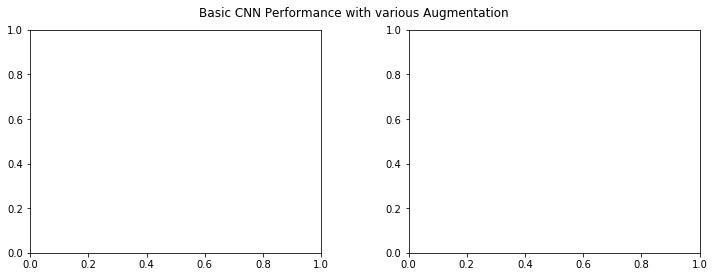

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with various Augmentation', fontsize=12)
f.subplots_adjust(top=0.90, wspace=0.3)

epoch_list = list(range(1,125))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 124, 125))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 124, 125))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")